In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\agupta\Downloads\amazon.csv", encoding = 'ISO-8859-1') 
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
# Data description and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [4]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [5]:
#describing data when number of fires have no 0s just for my reference.
data[data['number']!=0].describe()

,year,number
count,5837.000000,5837.000000
mean,2007.834847,119.740290
std,5.649076,197.199644
min,1998.000000,1.000000
25%,2003.000000,6.000000
50%,2008.000000,33.000000
75%,2013.000000,131.000000
max,2017.000000,998.000000


In [6]:
#Changing the column : Number to Numbertoffires for my convenience
data.rename(columns={'number': 'numberoffires'}, inplace = True)

In [7]:
#columns present in the data
list(data)

['year', 'state', 'month', 'numberoffires', 'date']

In [8]:
data['state'].value_counts()

Rio                 717
Mato Grosso         478
Paraiba             478
Alagoas             240
Maranhao            239
Espirito Santo      239
Sergipe             239
Santa Catarina      239
Sao Paulo           239
Goias               239
Piau                239
Amazonas            239
Amapa               239
Pernambuco          239
Rondonia            239
Roraima             239
Tocantins           239
Pará                239
Bahia               239
Minas Gerais        239
Ceara               239
Distrito Federal    239
Acre                239
Name: state, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF70346D8>]],
      dtype=object)

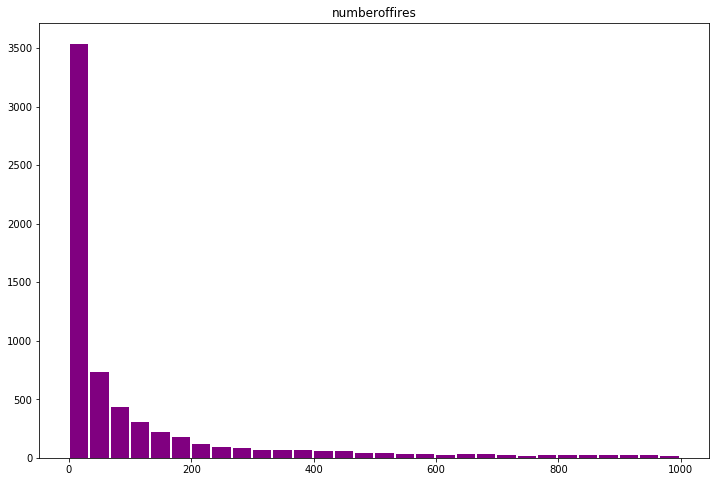

In [9]:
data.hist(column='numberoffires', bins=30, grid=False, figsize=(12,8), color='purple', zorder=2, rwidth=0.9)
#Plotting histogram to see num of fires 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


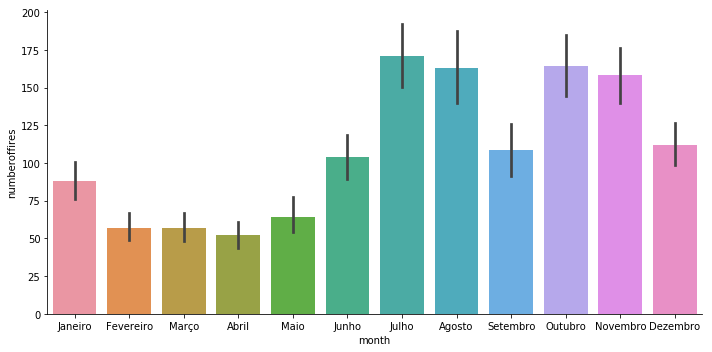

In [10]:
#Number of fires per month in the data
sns.catplot(x = 'month', y = 'numberoffires' , kind="bar", data=data, height=5, aspect=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF72D4240>]],
      dtype=object)

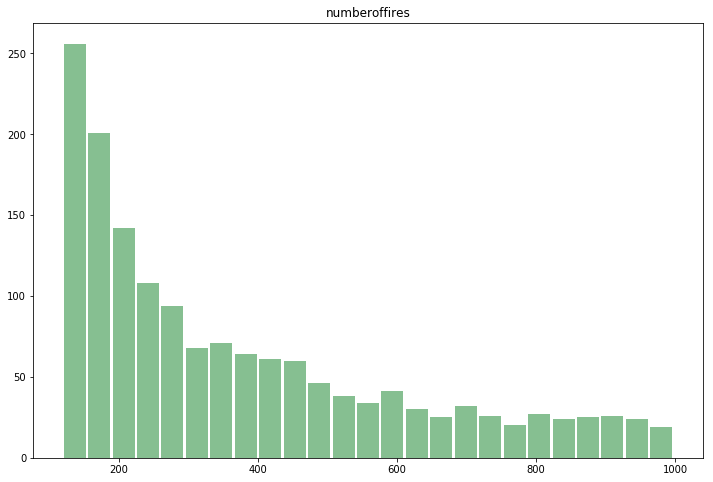

In [11]:
# Graph for number of fires with greater than equal to average which is >=119
data3 = data[data['numberoffires'] >=119]
data2 = data[data['numberoffires'] > 0.0]
#data3.hist(column='numberoffires', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
#data3.numberoffires.min()
data3.hist(column='numberoffires', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [12]:
#Extracting Month number from date 
data['Mon'] = pd.DatetimeIndex(data['date']).month

#Creating New dataframe for July and plotting number of fires
data_jul = data[data['month'] == 'Julho']
data_jul.set_index('date', inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDF73935C0>]],
      dtype=object)

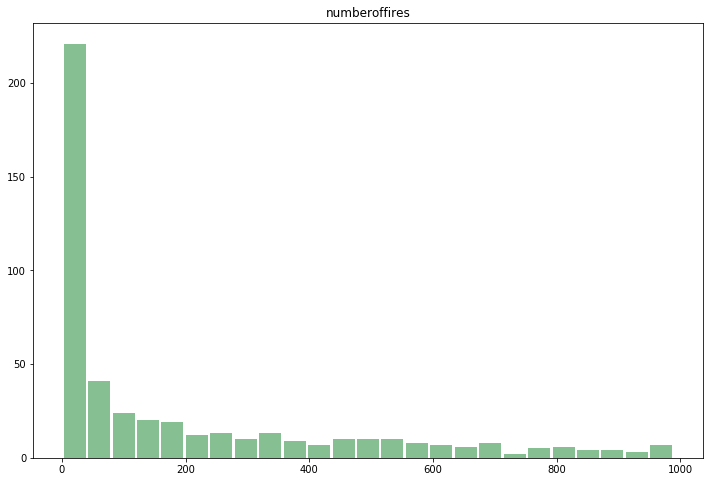

In [13]:
# Number of fires only for July month with numberoffires>0.0
data_jul[data_jul['numberoffires'] > 0.0].hist(column='numberoffires', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

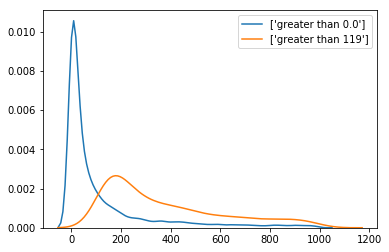

In [14]:
sns.kdeplot(data2['numberoffires'], label=['greater than 0.0'])
sns.kdeplot(data3['numberoffires'], label=['greater than 119'])
#Plotting numberoffiress> 0.0 and numberoffires> average

In [15]:
#Dropping Mon column as it does not give the same month in the month column which is confusing
data = data.drop(columns = 'Mon')
data.head()

,year,state,month,numberoffires,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Text(0.5, 1.0, 'numberoffires Vs Month')

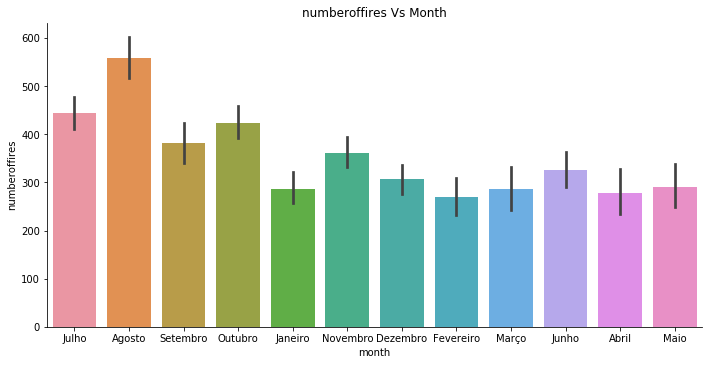

In [16]:
#Trying the above with catplot instead. And August has the higher number of fires with n
sns.catplot(x = 'month', y = 'numberoffires' , kind="bar", data=data3, height=5, aspect=2)
plt.title('numberoffires Vs Month')

In [17]:
#Adding another column as 'Season' from month
data.loc[ data.month == 'Janeiro', 'season' ] = 'winter'
data.loc[ data.month == 'Fevereiro', 'season' ] = 'winter'
data.loc[ data.month == 'Março', 'season' ] = 'winter'
data.loc[ data.month == 'Abril', 'season' ] = 'spring'
data.loc[ data.month == 'Maio', 'season' ] = 'spring'
data.loc[ data.month == 'Junho', 'season' ] = 'spring'
data.loc[ data.month == 'Julho', 'season' ] = 'summer'
data.loc[ data.month == 'Agosto', 'season' ] = 'summer'
data.loc[ data.month == 'Setembro', 'season' ] = 'summer'
data.loc[ data.month == 'Outubro', 'season' ] = 'autumn'
data.loc[ data.month == 'Novembro', 'season' ] = 'autumn'
data.loc[ data.month == 'Dezembro', 'season' ] = 'autumn'
list(data)

['year', 'state', 'month', 'numberoffires', 'date', 'season']

In [18]:
#Dropping Mon column
data_acre = data[data['state'] == 'Acre']
data_acre.head(10)

,year,state,month,numberoffires,date,season
0,1998,Acre,Janeiro,0.0,1998-01-01,winter
1,1999,Acre,Janeiro,0.0,1999-01-01,winter
2,2000,Acre,Janeiro,0.0,2000-01-01,winter
3,2001,Acre,Janeiro,0.0,2001-01-01,winter
4,2002,Acre,Janeiro,0.0,2002-01-01,winter
5,2003,Acre,Janeiro,10.0,2003-01-01,winter
6,2004,Acre,Janeiro,0.0,2004-01-01,winter
7,2005,Acre,Janeiro,12.0,2005-01-01,winter
8,2006,Acre,Janeiro,4.0,2006-01-01,winter
9,2007,Acre,Janeiro,0.0,2007-01-01,winter


Text(0.5, 1.0, 'numberoffires Vs Season')

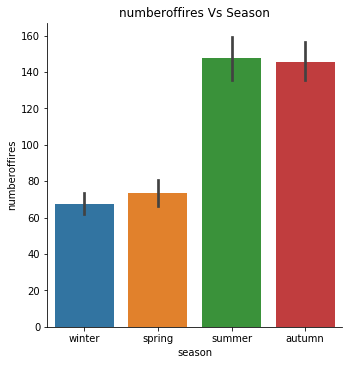

In [19]:
#Wanted to check which Season has the highest number of fires and Summer has the highest number of fires
sns.catplot(x = 'season', y = 'numberoffires' , kind="bar", data=data)
plt.title('numberoffires Vs Season')

Text(0.5, 1.0, 'numberoffires Vs Season')

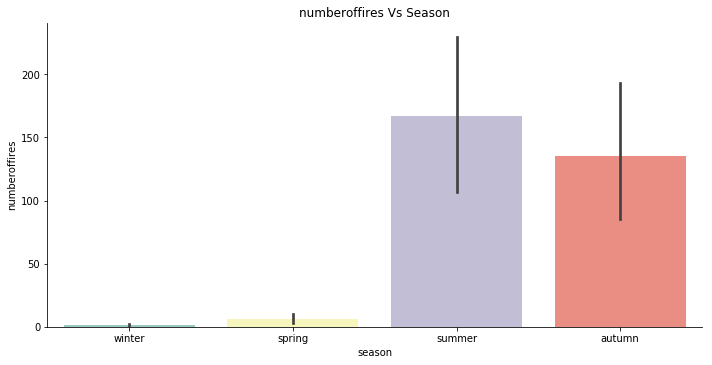

In [20]:
# State = Rio has the highest number of fires. So seeing which  Season and months have higher number for fires for ACRE
sns.catplot(x = 'season', y = 'numberoffires' , kind="bar", data=data_acre, palette="Set3", height=5, aspect=2)
plt.title('numberoffires Vs Season')


Text(0.5, 1.0, 'numberoffires Vs Month')

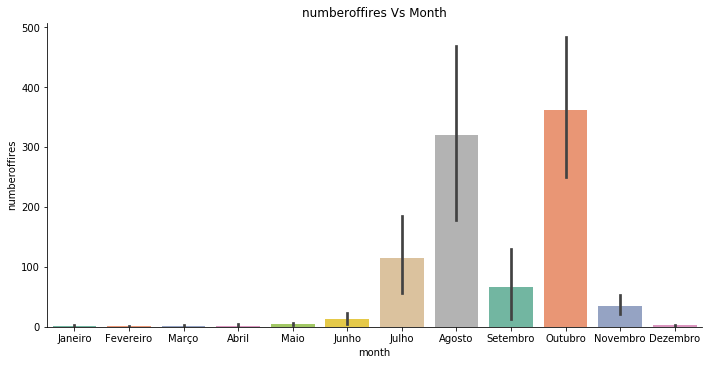

In [21]:
sns.catplot(x = 'month', y = 'numberoffires' , kind="bar", data=data_acre, palette="Set2", height=5, aspect=2)
plt.title('numberoffires Vs Month')
#September has the highest number of fires for Acre

In [22]:
 #Checking if any columns have missing value

data.apply(lambda x: sum(x.isnull()),axis=0) 
# And there are no missing values at all

year             0
state            0
month            0
numberoffires    0
date             0
season           0
dtype: int64

In [23]:
data_jan = data[data['month']== 'Janeiro']
data_jan.head()

,year,state,month,numberoffires,date,season
0,1998,Acre,Janeiro,0.0,1998-01-01,winter
1,1999,Acre,Janeiro,0.0,1999-01-01,winter
2,2000,Acre,Janeiro,0.0,2000-01-01,winter
3,2001,Acre,Janeiro,0.0,2001-01-01,winter
4,2002,Acre,Janeiro,0.0,2002-01-01,winter


In [24]:
jan_acre = data_jan.groupby('state')
jan_acre.get_group('Acre').head(10)

,year,state,month,numberoffires,date,season
0,1998,Acre,Janeiro,0.0,1998-01-01,winter
1,1999,Acre,Janeiro,0.0,1999-01-01,winter
2,2000,Acre,Janeiro,0.0,2000-01-01,winter
3,2001,Acre,Janeiro,0.0,2001-01-01,winter
4,2002,Acre,Janeiro,0.0,2002-01-01,winter
5,2003,Acre,Janeiro,10.0,2003-01-01,winter
6,2004,Acre,Janeiro,0.0,2004-01-01,winter
7,2005,Acre,Janeiro,12.0,2005-01-01,winter
8,2006,Acre,Janeiro,4.0,2006-01-01,winter
9,2007,Acre,Janeiro,0.0,2007-01-01,winter


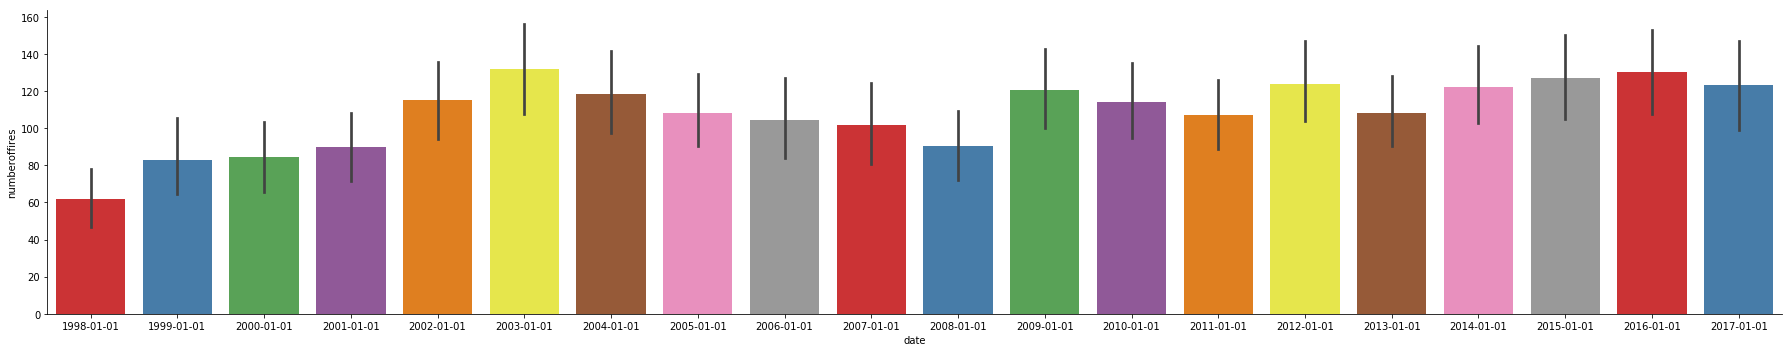

In [25]:
# Numberoffires distribution by date
sns.catplot(x = 'date', y = 'numberoffires' , kind="bar", data=data, palette="Set1", height=5, aspect=5)

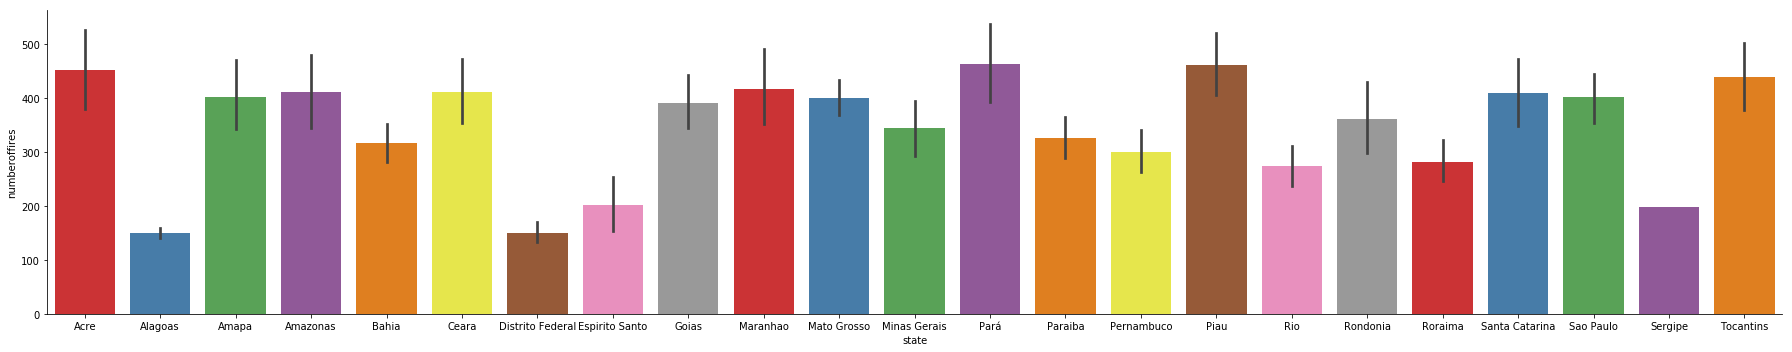

In [26]:
# Numberoffires>average distribution by state
sns.catplot(x = 'state', y = 'numberoffires' , kind="bar", data=data3, palette="Set1", height=5, aspect=5)

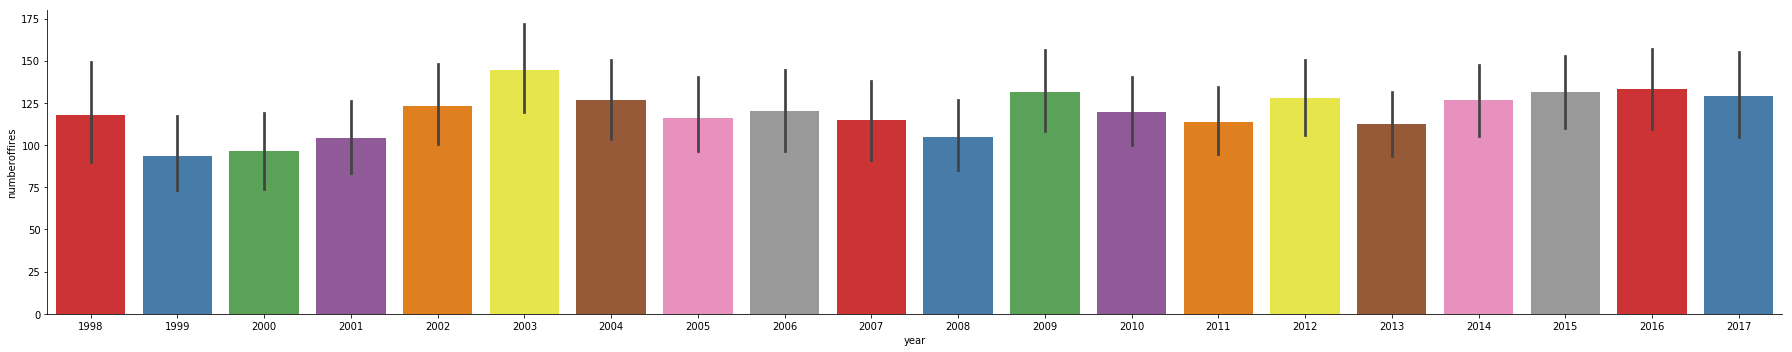

In [27]:
# Numberoffires distribution by year
sns.catplot(x = 'year', y = 'numberoffires' , kind="bar", data=data2, palette="Set1", height=5, aspect=5)

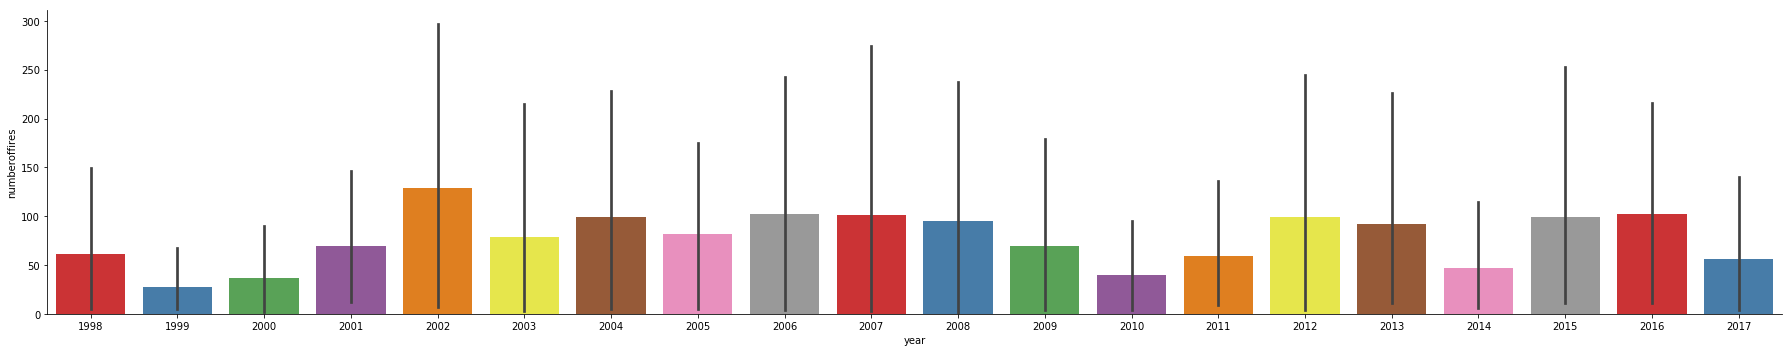

In [28]:
# Numberoffires distribution by month in Acre
sns.catplot(x = 'year', y = 'numberoffires' , kind="bar", data=data_acre, palette="Set1", height=5, aspect=5)

In [29]:
# Correlation matrix to see if any variables correlated

data.corr(method = 'pearson')

,year,numberoffires
year,1.000000,0.065201
numberoffires,0.065201,1.000000


In [30]:
#Visualization of correlation

#plt.matshow(data.corr())
#plt.show()
#plt.title('Correlation Matrix', fontsize=16)

In [33]:
data.shape

(6454, 6)

In [34]:
#converting date to numeric value
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date']=data['date'].map(dt.datetime.toordinal)

In [35]:
data.dtypes

year               int64
state             object
month             object
numberoffires    float64
date               int64
season            object
dtype: object

In [36]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head(10)

,state,month,season
0,Acre,Janeiro,winter
1,Acre,Janeiro,winter
2,Acre,Janeiro,winter
3,Acre,Janeiro,winter
4,Acre,Janeiro,winter
5,Acre,Janeiro,winter
6,Acre,Janeiro,winter
7,Acre,Janeiro,winter
8,Acre,Janeiro,winter
9,Acre,Janeiro,winter


In [37]:
obj_data["season"].value_counts()

winter    1621
summer    1620
spring    1620
autumn    1593
Name: season, dtype: int64

In [38]:
obj_data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [39]:
#Creating mapping dictionary for clean up season and month and finally mapping dictionary
season_sum = {"season": {'winter': 1,
                        'spring': 2,
                        'autumn': 3,
                        'summer': 4},
             "month": {'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril':4, 'Maio':5, 'Junho': 6, 'Julho':7, 'Agosto':8,
                      'Setembro': 9, 'Outubro':10, 'Novembro':11, 'Dezembro':12}}
data.replace(season_sum, inplace = True)


In [40]:
data.dtypes

year               int64
state             object
month              int64
numberoffires    float64
date               int64
season             int64
dtype: object

In [41]:
obj_data2 = data.select_dtypes(include=['object']).copy()

In [42]:
obj_data2.head()

,state
0,Acre
1,Acre
2,Acre
3,Acre
4,Acre


In [43]:
#Encoding states to nmeric value
data = pd.get_dummies(data, columns=["state"])

In [47]:
  #data.iloc[:, 0:3].values #Independent variables
data.head()

,year,month,numberoffires,date,season,state_Acre,state_Alagoas,state_Amapa,state_Amazonas,state_Bahia,...,state_Pará,state_Pernambuco,state_Piau,state_Rio,state_Rondonia,state_Roraima,state_Santa Catarina,state_Sao Paulo,state_Sergipe,state_Tocantins
0,1998,1,0.0,729390,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1999,1,0.0,729755,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,1,0.0,730120,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,1,0.0,730486,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2002,1,0.0,730851,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X = data.iloc[:,[0,1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]].values # Independent Variables
y = data.iloc[:, 2] #Dependent Variables

In [58]:
#Applying Random Forest to predict future numberoffires

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
# Visualizing the RF model
#X_grid = np.arange([min(X) | max(X), 0.01])
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'blue')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
#plt.title('Number of fires(Random Forest regression)')
#plt.xlabel('factors leading to fires in the forest')
#plt.ylabel('Number of fires')